<figure> 
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Métodos ensamblados mixtos: Boosting</center></span>

<figure> 
<center>
<img src="../Imagenes/Mix_2_colors.jpg"  width="600" height="600" align="center"/>
<figcaption> </figcaption>
</center>
</figure>

Fuente <a href="https://commons.wikimedia.org/wiki/File:Mix_2_colors_(Unsplash).jpg">Pietro Jeng pietrozj</a>, CC0, via Wikimedia Commons

## <span style="color:blue">Referencias</span>

1. [Breiman, Friedman, Olsen, Stone, Classification and Regression Trees, 1984](http://library.lol/main/26908B6EDA02CA4FAF25ADBF57A12B26)
1. [Kumar, A. and Jain, M., Ensemble learning for AI developers](http://library.lol/main/AC20329F24A966566561C7BF2A2A8529)
1. [Alvaro Montenegro y Daniel Montenegro, Inteligencia Artificial y Aprendizaje Profundo, 2022](https://github.com/AprendizajeProfundo/Diplomado)
1. [scikit-learn, Gradient-boosting](https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting)
1. [all-you-need-to-know-about-gradient-boosting-algorithm-clasiffication](https://towardsdatascience.com/all-you-need-to-know-about-gradient-boosting-algorithm-part-2-classification-d3ed8f56541e)
1. [all-you-need-to-know-about-gradient-boosting-algorithm-regression](https://towardsdatascience.com/all-you-need-to-know-about-gradient-boosting-algorithm-part-1-regression-2520a34a502)

## <span style="color:blue">Autores</span>

1. Alvaro  Montenegro, PhD, ammontenegrod@unal.edu.co
1. Daniel  Montenegro, Msc, dammontenegrore@unal.edu.co


## <span style="color:blue">Asesora de Medios y  Marketing</span>

1. Maria del Pilar Montenegro, pmontenegro88@gmail.com

## <span style="color:blue">Contenido</span>

* [Introducción](#Introducción)
* [Algoritmo k-vecinos más cercanos para clasificación](#Algoritmo-k-vecinos-más-cercanos-para-clasificación)
* [Métodos ensamblados por votación](#Métodos-ensamblados-por-votación)
* [Boosting](#Boosting)

## <span style="color:blue">Introducción</span>

En la primera parte de esta lección revisamos como entrenar diferentes máquinas de aprendizaje para el mismo conjunto de datos, para luego combinar los resultados usando diferentes técnicas en forma de votación y promediando.

En la segunda parte de la lección aprenderemos la técnica boosting, en la cual a partir de modelos en principio débiles es posible obtener modelos más fuertes mejorando los previos mediante técnicas de mejora, impulso o boosting.

## <span style="color:blue">Algoritmo k-vecinos más cercanos para clasificación</span>

Adaptado de  de [IBM](https://www.ibm.com/topics/knn#:~:text=The%20k%2Dnearest%20neighbors%20algorithm%2C%20also%20known%20as%20KNN%20or,of%20an%20individual%20data%20point.).
El algoritmo de k-vecinos más cercanos, también conocido como KNN o k-NN, es un clasificador de aprendizaje supervisado no paramétrico, que utiliza la proximidad para hacer clasificaciones o predicciones sobre la agrupación de un punto de datos individual. Si bien se puede usar para problemas de regresión o clasificación, generalmente se usa como un algoritmo de clasificación, partiendo de la hipótesis de que se pueden encontrar puntos similares cerca uno del otro.


Para los problemas de clasificación, se asigna una etiqueta de clase sobre la base de un voto mayoritario, es decir, se utiliza la etiqueta que se representa con mayor frecuencia alrededor de un punto de datos determinado. Si bien esto se considera técnicamente "voto de la mayoría", el término "voto de la mayoría" se usa más comúnmente en la literatura. La distinción entre estas terminologías es que el "voto mayoritario" requiere técnicamente una mayoría superior al 50 %, lo que funciona principalmente cuando solo hay dos categorías. Cuando tiene varias clases, por ejemplo, cuatro categorías, no necesita necesariamente el 50% de los votos para llegar a una conclusión sobre una clase; puede asignar una etiqueta de clase con un voto superior al 25%. 

## <span style="color:blue">Métodos ensamblados por votación</span>

### <span style="color:#4CC9F0">Votación dura </span></span>

El conjunto de datos en el siguiente ejemplo se entrena usando tres modelos de aprendizaje automático: 

* k-vecinos más cercanos (KNN), 
* bosque aleatorio y 
* regresión logística,

utilizando la biblioteca de Python   `scikit-learn`. 

El ensamble completo se desarrola en dos pasos.


1. En cada tipo de modelo, se prueban varios modelos usando la ´tecnica de grilla implementada en la clase *GridSearchCV*. Para lograrlo, al procedimiente se le entrega un conjunto de hiperparámetros que el objeto de tipo *GridSearchCV* recorre. Por ejemplo, en el caso de método de *k*-vecinos más cercanos hemos selecionado los número de vecinos más cercanos 1,2,...24. Adicionalmente, para cada hiperparámetro se emplea la técnica de validación cruzada *k*-fold, en la cual se seleccionan *k* muestras distintas para estimar el modelo. Se escoge el modelo con los mejores resultados de validación. Todo esto ocurre debajo de capó. Al final resulta escogido el mejor de todos los modelos.

2. Las salidas de los 3 modelos seleccionados del paso anterior, se combinan luego usando un clasificador de votación implementado en la biblioteca scikit-learn. La votación dura significa en el caso de clasificación, que la clase más votada (más seleccionada por los distintos modelos) es la clase seleccionada como respuesta. 

Si se mide la precisión resultante de cada uno de los modelos individuales, así como la
modelo ensamblado en el conjunto de datos de prueba, se debe observar una muy buena mejora en la precisión en el modelo ensamblado.

El siguiente ejemplo es adaptado de [scikit-learn Ensemble methods](https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting) y [Kumar, A. and Jain, M., Ensemble learning for AI developers](http://library.lol/main/AC20329F24A966566561C7BF2A2A8529), para los datos de cáncer de seno.

In [ ]:
# carga ibrerías
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_breast_cancer
import numpy as np

# carga los datos
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.3, stratify=y, random_state=123)

### k-vecinos más cercanos
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
params_knn = {'n_neighbors': np.arange(1, 25)}
knn_gs = GridSearchCV(knn, params_knn, cv=5) #CV: validación cruzada
knn_gs.fit(X_train, y_train)
knn_best = knn_gs.best_estimator_

### Clasificador bosque aleatorio
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
params_rf = {'n_estimators': [50, 100, 200]}
rf_gs = GridSearchCV(rf, params_rf, cv=5)
rf_gs.fit(X_train, y_train)
rf_best = rf_gs.best_estimator_

### Clasificador Regresión Logística
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=123,
solver='liblinear', penalty='l2', max_iter=5000)
C = np.logspace(1, 4, 10)
params_lr = dict(C=C)

lr_gs = GridSearchCV(log_reg, params_lr, cv=5, verbose=0)
lr_gs.fit(X_train, y_train)
lr_best = lr_gs.best_estimator_


# Combina los tres Conjuntos de Votación
from sklearn.ensemble import VotingClassifier
estimators=[('knn', knn_best), ('rf', rf_best), ('log_reg',
lr_best)]
ensemble = VotingClassifier(estimators, voting='hard')
ensemble.fit(X_train, y_train)
print("knn_gs.score: ", knn_best.score(X_test, y_test))
# salida: knn_gs.score:  0.9239766081871345
print("rf_gs.score: ", rf_best.score(X_test, y_test))
# salida: rf_gs.score:  0.9766081871345029
print("log_reg.score: ", lr_best.score(X_test, y_test))
#salida: log_reg.score:  0.9590643274853801
print("ensemble.score: ", ensemble.score(X_test, y_test))

# salida
# knn_gs.score:  0.9239766081871345
# rf_gs.score:  0.9766081871345029
# log_reg.score:  0.9707602339181286
# ensemble.score:  0.9766081871345029

### <span style="color:#4CC9F0">Modelos ensamblados por promedio: soft voting</span>

Promediar es otra forma de combinar la salida de diferentes clasificadores. La principal diferencia entre votación dura votación suave es que al promediar, tomamos la probabilidad de predicción de cada clase por separado del modelo y luego se combinar las probabilidades resultantes tomando el promedio de estos predicciones se mantiene la 'opinión' de cada uno de los modelos empleados.

Este método de combinación se llama votación suave. Promediar es otra forma de combinar la salida de diferentes clasificadores.

La principal diferencia entre votar y promediar es que al promediar, tomamos la probabilidad de predicción de cada clase por separado del modelo y luego combine las probabilidades resultantes tomando el promedio de estas predicciones Este método de combinación se llama votación suave.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_breast_cancer
import numpy as np

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.3, stratify=y, random_state=0)

### k-Nearest Neighbors (k-NN)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
params_knn = {'n_neighbors': np.arange(1, 25)}
knn_gs = GridSearchCV(knn, params_knn, cv=5)
knn_gs.fit(X_train, y_train)
knn_best = knn_gs.best_estimator_
knn_gs_predictions = knn_gs.predict(X_test)

### Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
params_rf = {'n_estimators': [50, 100, 200]}
rf_gs = GridSearchCV(rf, params_rf, cv=5)
rf_gs.fit(X_train, y_train)
rf_best = rf_gs.best_estimator_
rf_gs_predictions = rf_gs.predict(X_test)

### Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=123,
solver='liblinear', penalty='l2', max_iter=5000)
C = np.logspace(1, 4, 10)
params_lr = dict(C=C)
lr_gs = GridSearchCV(log_reg, params_lr, cv=5, verbose=0)
lr_gs.fit(X_train, y_train)
lr_best = lr_gs.best_estimator_
log_reg_predictions = lr_gs.predict(X_test)

# combine all three by averaging the Ensembles results
average_prediction = (log_reg_predictions + knn_gs_predictions
+ rf_gs_predictions)/3.0
# Alternatively combine all through using VotingClassifier with voting='soft' parameter

# combine all three Voting Ensembles
from sklearn.ensemble import VotingClassifier
estimators=[('knn', knn_best), ('rf', rf_best), ('log_reg', lr_best)]
ensemble = VotingClassifier(estimators, voting='soft')
ensemble.fit(X_train, y_train)

# salidas
print("knn_gs.score: ", knn_gs.score(X_test, y_test))

print("rf_gs.score: ", rf_gs.score(X_test, y_test))

print("log_reg.score: ", lr_gs.score(X_test, y_test))

print("ensemble.score: ", ensemble.score(X_test, y_test))

In [ ]:
#knn_gs.score:  0.9239766081871345
#rf_gs.score:  0.9532163742690059
#log_reg.score:  0.9415204678362573
#ensemble.score:  0.935672514619883

En el resto de la lección revisamos métodos mixtos.

## <span style="color:blue">Boosting</span>

Empezamos con un colección de modelos (`learners`). Cada learner de ML es entrenado  en un subconjunto particular de objetos de entrenamiento. Si un  modelo tiene un desempeño bajo, podríamos proporcionar mayor énfasis a ese alumno en particular. Esto se conoce como **boosting** (impulso).

### <span style="color:#4CC9F0">AdaBoost</span>

Primero, analicemos una de las estrategias  más simple pero más importantes de boosting,  `AdaBoost`. Empezamos con un colección de learners. Cada alumno de ML se entrena con un subconjunto particular de objetos de entrenamiento. Si un  modelo tiene un desempeño bajo, podríamos proporcionar mayor énfasis a ese modelo en particular. Esto se conoce como impulsar Primero, analicemos uno de los más simples pero más importantes de impulsar técnicas, AdaBoost.



<figure> 
<center>
<img src="../Imagenes/adaboost.png"  width="600" height="600" align="center"/>
<figcaption> </figcaption>
</center>
    
Fuente. Tomada de [Kumar, A. and Jain, M., Ensemble learning for AI developers](http://library.lol/main/AC20329F24A966566561C7BF2A2A8529)

El procedimiento es como sigue.

1. Inicialmente un modelo es entrenado con los datos originales. En la imagen, los puntos verdes  son bien clasificados y los rojos mal clasificados. Inicialmente todos los datos tiene peso 1.
1. En el siguiente paso, a los datos mal clasificados  se les incrementa el peso y se corre el entrenamiento de nuevo. Esta estrategia hace que el modelo preste más atención a esos datos con mayores pesos. Teóricamente, algunos objetos adicionales  quedan bien clasificados, pero otros permanecen más clasificados.
1. El paso anterior se repite a lograr la exactitud deseada.  El siguiente ejemplo muestra cómo usar AdaBoost con la biblioteca scikit-learn.

Ilustramos el procedimiento usando *scikit-learn* para los datos Iris. De forma predeterminada, *scikit-learn* utiliza un árbol de decisión como modelo básico, con profundidad máxima = 1. Para hacer un clasificador *AdaBoost*, pasamos un parámetro adicional, *n_estimadores* (en este ejemplo, n_estimadores = 100). *AdaBoost* se ejecuta en cada copia de pesos potenciada hasta que haya un ajuste de datos perfecto o el límite de *n_estimators* se alcance.


In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

X, y = load_iris(return_X_y=True)
clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, X, y, cv=5)
print(scores.mean())

0.9466666666666665


Es importante entender que en cada paso del proceso boosting, un modelo que inicialmente puede ser muy débil es impulsado (mejorado), boosting, hacia un mejor modelo con el incremento de pesos en las observaciones mal clasificadas originalmente. ES decir, en cada paso se obtiene un modelo que hace mejor el trabajo de clasificación.

### <span style="color:#4CC9F0">Refuerzo del gradiente: Gradient Boosting</span>

El refuerzo de gradiente es similar a los métodos generales de boosting.  A diferencia de *AdaBoost*, en donde agrega un nuevo learner (modelo) después de aumentar el peso de las observaciones  mal clasificadas, en *gradient boosting*,  se entrena un nuevo modelo sobre los errores  residuales
cometidos por el predictor anterior.

### <span style="color:#4CC9F0">Refuerzo del gradiente: Gradient Boosting - Regresión</span>

Basado en [Wikipedia](https://en.wikipedia.org/wiki/Gradient_boosting).

Al igual que otros métodos boosting, el `gradient boosting` combina "modelos" débiles en un solo modelo fuerte de manera iterativa. 

Es más fácil de explicar en la configuración de regresión de mínimos cuadrados , donde el objetivo es "entrenar" un modelo $\mathbf{F}$ para predecir valores de la forma $\hat{y} = \mathbf{F}(x)$ minimizando el error cuadrático medio $\tfrac{1}{n}\sum_{i}(\hat{y}_{i}-y_{i})^{2}$, para $n$ datos de entrenamiento $y_i$.

Ahora, consideremos un algoritmo gradient boosting con $M$ etapas $1 \leq m \leq M$. Supongamos algún modelo imperfecto $\mathbf{F}_m$. Para $m$ muy bajo el modelo regresa simplemente $\bar{y}_i = \bar{y}$.

 Para mejorar $\mathbf{F}_m$, nuestro algoritmo debería agregar algún nuevo estimador, $h_{m}(x)$, de tal modelo que  


$$
F_{m+1}(x_{i})=F_{m}(x_{i}) + h_{m}(x_{i}) = y_{i}
$$

o equivalente,

$$
 h_{m}(x_{i}) =  y_{i} - F_{m}(x_{i})
$$


 Para mejorar $\mathbf{F}_m$, nuestro algoritmo debería agregar algún nuevo estimador, Por lo tanto, el gradient boosting  $h_{m}$ al residual $y_{i}-F_{m}(x_{i})$. Como en otras variantes de boosting, cada $F_{m+1}$ intenta corregir los errores de su antecesor $F_m$. Se puede observar que los residuales $h_{m}(x_{i})$  para un modelo dado son proporcionales a los gradientes negativos de la función de pérdida del error cuadrático medio (MSE) con respecto a $F(x_i)$:$h_{m}(x)$, de tal modelo que  



$$
\begin{align}
L_{MSE} &= \frac{1}{n}\sum_{i=1}^{n}\left(y_{i}-F(x_{i})\right)^{2}\\
-\frac{\partial L_{MSE}}{\partial F(x_{i})} &= \frac{2}{n}(y_{i}-F( x_{i}))=\frac{2}{n}h_{m}(x_{i})
\end{align}
$$


Por lo tanto, el aumento de gradiente podría especializarse en un algoritmo de descenso de gradiente  y generalizarlo implica "conectar" a una pérdida diferente en su gradiente.

A continuación ilustramos gradient boost con ejemplo con datos sintéticos para clasificación generados con la función *make_hastie_10_2*.


### <span style="color:#4CC9F0">Gradient boosting paso a paso</span>

En esta sección ilustramos como se construye un modelo gradient boosting. Por facilidad en la explicación utilizaremos la función de pérdida error cuadrático medio, debido a que nos enfrentamos a un problema de regresión.

Supongamos que deseamos construir un modelo de regresión para el siguiente conjunto de datos.


<figure> 
<center>
<img src="../Imagenes/gradient_boosting_0.webp"  width="600" height="600" align="center"/>
<figcaption> </figcaption>
</center>
</figure>

Fuente [Masui, T., ,All You Need to Know about Gradient Boosting Algorithm](https://towardsdatascience.com/all-you-need-to-know-about-gradient-boosting-algorithm-part-1-regression-2520a34a502)

#### <span style="color:#4CC9F0">Paso 0. Modelo más ingenuo</span>

Inicialmente consideramos el modelo más ingenuo posible. Tal modelo se denota por $F_0(x)$.  Nuestro modelo más simple es considerar una constante. Es decir $F_0(x) = \lambda$. El valor de $\lambda$ se obtiene directamente, resolviendo la siguiente ecuación:

$$
F_0(x) = \arg \min_{\lambda} \frac{1}{n}\sum_{i=1} ^n L(y_i, \lambda)= \arg \min_{\lambda} \frac{1}{n}\sum_{i=1} ^n (y_i-\lambda)^2.
$$

Derivando con respecto a $F_0(x)$, es decir con respecto a $\lambda$ se obtiene

$$
\frac{\partial L}{\partial F_0(x)} = -\frac{2}{n}\sum_{i=1} ^n (y_i-\lambda),
$$

Este es el gradiente de $L$ con respecto a $F_0(x)$. En este caso podemos obtener directamente que 

$$
F_0(x) = \lambda = \bar{y}.
$$

La imagen muestra el modelo $F_0(x)$ para los datos.

<figure> 
<center>
<img src="../Imagenes/gradient_boosting_1.webp"  width="600" height="600" align="center"/>
<figcaption> </figcaption>
</center>
</figure>

Fuente [Masui, T., ,All You Need to Know about Gradient Boosting Algorithm](https://towardsdatascience.com/all-you-need-to-know-about-gradient-boosting-algorithm-part-1-regression-2520a34a502)

#### <span style="color:#4CC9F0">Paso 1. Cálculo de los residuales</span>

Para mejorar las predicciones vamos a concentrarnos en los residuales del modelo ingenuo. Estos son definidos por

$$
r_{i1} = y_i - f_0(x_i) = y_i - \lambda.
$$

Para minimizar estos residuales vamos a construir un árbol de regresión con $x$ como característica (feature) y $r_{i1}$ como objetivo (target). Por ejemplo, supongamos que la mejor partición se obtiene para $x=49.5$.  Observe la siguiente gráfica con detenimiento.

Ahora las predicciones son: 
* Para la hoja izquierda $\gamma_1 = 6$.
* Para la hoja derecha $\gamma_1 = -5.9$.

Esta predicción es adicionada al modelo. Para regularizar el modelo usaremos una rata de aprendizaje que será un valor $\nu$, tal que $0\le \nu \le 1$. Por ejemplo tomemos $\nu= 0.9$.

Entonces el nuevo modelo es

$$
F_1(x) = F_0(x) + \nu \gamma_1 
$$

Para el ejemplo de la imagen se ha tomado $\nu= 0.9$, para facilitar la interpretación en el gráfico. En la práctica, se espera un valor de $\nu\le 0.1$.

<figure> 
<center>
<img src="../Imagenes/gradient_boosting_2.webp"  width="600" height="600" align="center"/>
<figcaption> </figcaption>
</center>
</figure>

Fuente [Masui, T., ,All You Need to Know about Gradient Boosting Algorithm](https://towardsdatascience.com/all-you-need-to-know-about-gradient-boosting-algorithm-part-1-regression-2520a34a502)

Observe que el modelos actual, es definido de manera específica como sigue. $\nu=0.9$

$$
F_1(x) = \begin{cases} & \bar{y} + 6.0\times 0.9 \text{ si } x \le  49.5\\
          & \bar{y} - 5.9\times 0.9 \text{ si } x > 49.5
          \end{cases}
$$

#### <span style="color:#4CC9F0">Nota sobre el gradiente en el paso *m*</span>

Observe que el modelo $F(x)$ se obtiene técnicamente como sigue. Los residuales en el paso $m$ siempre tienen la forma

$$
r_{im} = -\left[\frac{\partial L(y_i, F(x_i))}{\partial F(x)}\right]_{F(x_i)= F_{m-1}(x_i)}.
$$

El gradiente en est ejemplo es muy simple para facilitar la exposición, pero es muestra la forma general como aparecen los residuales a partir del gradiente de la función de pérdida con respecto a $F(x)$ en cada paso. el nombre de `gradient boosting` proviene de esta observación. La siguiente imagen muestra el estado del modelo luego del paso 1.

<figure> 
<center>
<img src="../Imagenes/gradient_boosting_3.webp"  width="600" height="600" align="center"/>
<figcaption> </figcaption>
</center>
</figure>

Fuente [Masui, T., ,All You Need to Know about Gradient Boosting Algorithm](https://towardsdatascience.com/all-you-need-to-know-about-gradient-boosting-algorithm-part-1-regression-2520a34a502)

#### <span style="color:#4CC9F0">Algoritmo Gradient Boosting - Regresión</span>


* Inicializa el modelo con un valor constante:
$$
F_0(x) = \arg \min_{\lambda} \frac{1}{n}\sum_{i=1} ^n L(y_i, \lambda)= \arg \min_{\lambda} \frac{1}{n}\sum_{i=1} ^n (y_i-\lambda)^2.
$$
*  Para m=1 hasta M:
    + Calcula los residuales $r_{im} = -\left[\frac{\partial L(y_i, F(x_i))}{\partial F(x)}\right]_{F(x_i)= F_{m-1}(x_i)}, \hspace{1mm} i=1,\ldots, n$.
    + Entrena un árbol de regresión con característica $x$ y objetivo $r$ y crea los nodos terminales $R_{jm},\hspace{1mm} j= 1,\ldots, J_m$
    + Calcula $$\lambda_{jm} = \arg \min_{\lambda} \sum_{x_i\in R_{jm}} L(y_i, F_{m-1}(x_i)+\lambda), \hspace{1mm} j= 1,\ldots, J_m$$
    + Actualiza el modelo: $$ F_m(x) = F_{m-1}(x) + \nu \sum_{j=1}^{J_m} \lambda_{jm} 1_{x\in R{jm}}$$


#### <span style="color:#4CC9F0">Ejemplo con datos sintéticos</span>

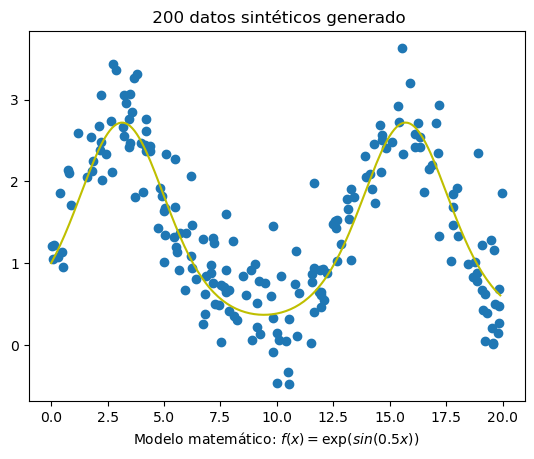

In [34]:
## Genera los datos
import numpy as np
import matplotlib.pyplot as plt

# modelo matemático
def f(x):
    return np.exp(np.sin(0.5*x))

x = np.arange(0, 20,.1)
y = f(x)

# datos smulados con ruido gaussiano(0, 0.2)
np.random.seed(100)
xp = np.random.uniform(0,20, size = 200)
# introducimos ruido
yp = f(xp) + np.random.normal(0, 0.4, xp.shape[0])

# gráfico
plt.plot(x, y, color = "y")
plt.scatter(xp, yp)
plt.title(' 200 datos sintéticos generado')
plt.xlabel('Modelo matemático: $f(x) = \exp (sin(0.5 x))$')
plt.show()

(200, 1)
(200,)
 Modelo gradiente boosting: RMSE:0.736639178936160


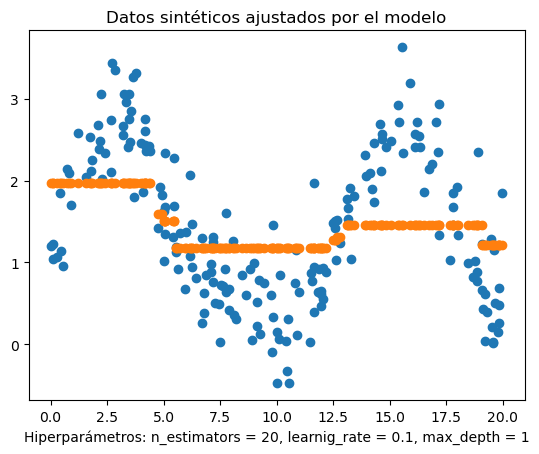

In [75]:
# modelo Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# hiperparámetros
n_estimators = 20
learning_rate = 0.1
max_depth = 1

# instancia el modelo
custom_gbm = GradientBoostingRegressor(
    n_estimators=n_estimators, 
    learning_rate=learning_rate, 
    max_depth=max_depth
)

# convierte los features en matriz, requerido por sklearn
xp = np.reshape(xp, (-1,1))
print(xp.shape)
print(yp.shape)

# ajusta el modelo
custom_gbm.fit(xp, yp)

# calcula prediccciones
yp_pred = custom_gbm.predict(xp)

# calcula métricas
custom_gbm_rmse = mean_squared_error(yp, yp_pred, squared=False)
print(f" Modelo gradiente boosting: RMSE:{custom_gbm_rmse:.15f}")

# plot
plt.scatter(xp, yp)
plt.scatter(xp, yp_pred)
plt.title('Datos sintéticos ajustados por el modelo')
plt.xlabel('Hiperparámetros: n_estimators = {}, learnig_rate = {}, max_depth = {}'.format(n_estimators, learning_rate,max_depth))
plt.show()

### <span style="color:#4CC9F0">Refuerzo del gradiente: Gradient Boosting - Clasificación</span>

El algoritmo completo es como sigue.

Para facilitar la explicación, supondremos que tenemos el problema de clasificación en dos clases del siguiente conjunto de datos.


<figure> 
<center>
<img src="../Imagenes/gradient_boosting_10.webp"  width="600" height="600" align="center"/>
<figcaption> </figcaption>
</center>
</figure>

Fuente [Masui, T., all-you-need-to-know-about-gradient-boosting-algorithm-clasiffication](https://towardsdatascience.com/all-you-need-to-know-about-gradient-boosting-algorithm-part-2-classification-d3ed8f56541e)

El primer paso es hacer una predicción uniforme sobre la probabilidad de la clase 1.  Como en el caso de regresión haremos

$$
p = P(Y=1) = \bar{y}
$$

La siguiente representación 3D ilustra el procedimiento. Hemos colocado sobre el plano $Y =p= \bar{y}$ a los puntos de la clase 1.

<figure> 
<center>
<img src="../Imagenes/gradient_boosting_11.webp"  width="600" height="600" align="center"/>
<figcaption> </figcaption>
</center>
</figure>

Fuente [Masui, T., all-you-need-to-know-about-gradient-boosting-algorithm-clasiffication](https://towardsdatascience.com/all-you-need-to-know-about-gradient-boosting-algorithm-part-2-classification-d3ed8f56541e)

Para mejorar la predicción nos enfocamos de nuevo en los residuales, definidos con

$$
r_i = y_i-p
$$

En la siguiente imagen se ilustran los residuales del ejemplo.

<figure> 
<center>
<img src="../Imagenes/gradient_boosting_12.webp"  width="600" height="600" align="center"/>
<figcaption> </figcaption>
</center>
</figure>

Fuente [Masui, T., all-you-need-to-know-about-gradient-boosting-algorithm-clasiffication](https://towardsdatascience.com/all-you-need-to-know-about-gradient-boosting-algorithm-part-2-classification-d3ed8f56541e)

En esta paso se construyen árboles de regresión, cada uno de los cuales se divide en dos nodos terminales. Tenga en cuenta que los árboles que aumentan el gradiente suelen tener árboles un poco más profundos, como los que tienen de 8 a 32 nodos terminales.

En el ejemplo se ha creando el primer árbol que predice los residuos con dos valores diferentes $r = \{0.1, -0.6 \}$.

<figure> 
<center>
<img src="../Imagenes/gradient_boosting_13.webp"  width="600" height="600" align="center"/>
<figcaption> </figcaption>
</center>
</figure>

Fuente [Masui, T., all-you-need-to-know-about-gradient-boosting-algorithm-clasiffication](https://towardsdatascience.com/all-you-need-to-know-about-gradient-boosting-algorithm-part-2-classification-d3ed8f56541e)

Ahora puede pensar que queremos agregar estos valores predichos a nuestra predicción inicial $p$ para reducir sus residuos, como hicimos arriba, pero las cosas son ligeramente diferentes con la clasificación. Los valores (lo llamamos $\lambda$, lambda) que estamos agregando a nuestra predicción inicial se calculan en la siguiente fórmula:

$$
\lambda_j = \frac{\sum_{x_i \in R_j}(y_i-p)}{\sum_{x_i \in R_j} p(1-p)}
$$

Este $\lambda$ no se suma simplemente a nuestra predicción inicial $p$. En su lugar, estamos convirtiendo $p$ en probabilidades logarítmicas (lo llamaremos valor $F(x)$ convertido en probabilidades logarítmicas), y luego le sumamos $\lambda$. Para aquellos que no están familiarizados con log-odds, se define a continuación. Piense que estamos haciendo una regresión logística en realidad. Le recordamos que

$$
\log (\text{odds}) =  \log \left[\frac{p}{1-p} \right]
$$

El modelo actualizado es 

$$
F(x) = F_0(x) + \nu \lambda,
$$
con $\nu$ la rata de aprendizaje. El algoritmo es como sigue


#### <span style="color:#4CC9F0">Algoritmo Gradient Boosting - Clasificación</span>

La función de pérdida es realmente el único cambio con respecto al algoritmo de regresión. En este caso la función de pérdida es 

$$
L() \sum_{i}(y_i \log p + (1-y_i) \log(1-p)).
$$

El algoritmo es entonces

* Inicializa el modelo con un valor constante:
$$
F_0(x) = \arg \min_{\lambda} \frac{1}{n}\sum_{i=1} ^n L(y_i, \lambda)= \arg \min_{\lambda} \frac{1}{n}\sum_{i=1} ^n (y_i-\lambda)^2.
$$
*  Para m=1 hasta M:
    + Calcula los residuales $r_{im} = -\left[\frac{\partial L(y_i, F(x_i))}{\partial F(x)}\right]_{F(x_i)= F_{m-1}(x_i)}, \hspace{1mm} i=1,\ldots, n$.
    + Entrena un árbol de regresión con característica $x$ y objetivo $r$ y crea los nodos terminales $R_{jm},\hspace{1mm} j= 1,\ldots, J_m$
    + Calcula $$\lambda_{jm} = \arg \min_{\lambda} \sum_{x_i\in R_{jm}} L(y_i, F_{m-1}(x_i)+\lambda), \hspace{1mm} j= 1,\ldots, J_m$$
    + Actualiza el modelo: $$ F_m(x) = F_{m-1}(x) + \nu \sum_{j=1}^{J_m} \lambda_{jm} 1_{x\in R{jm}}$$.


#### <span style="color:#4CC9F0">EjemploGradient Boosting - Clasificación</span>

Ilustramos con el dataset hastie_10_2 de scikit-learn.

In [76]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

# sube los datos
X, y = make_hastie_10_2(random_state=0)

# instancia el objeto GradientBoostingClassifier y ajusta el modelo
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X, y)

# Validacion cruzada
scores = cross_val_score(clf, X, y, cv=5)
print(scores.mean())

0.9225


### <span style="color:#4CC9F0">XGBoost</span>

XGBoost es un algoritmo y un sistema de software de última generación que se especializa en técnicas de aumento de gradiente residual. Mejora la técnica gradient boosting vainilla presentado arriba agregando los siguientes parámetros:


* Determina dinámicamente la profundidad de los árboles de decisión utilizados como aprendices débiles, añadiendo  parámetros de penalización  para la prevención de árboles con gran profundidad. Este evita el sobre ajuste y mejora el rendimiento.
* Utiliza la reducción proporcional de los nodos de las hojas de los árboles.
* Utiliza el Newton's tree boosting  para optimizar el aprendizaje de estructuras de árboles.
* Agrega parámetros de aleatorización para un aprendizaje óptimo.

Puede consultar la documentación completa de XGBost [aquí](https://xgboost.readthedocs.io/en/latest/).


### <span style="color:#4CC9F0">Ejemplo de uso de XGBoost

 Para los detalles de uso de XGBoost lo remitimos al sitio oficial en Github [xgboost](https://github.com/dmlc/xgboost/tree/master/demo/CLI/regression). Es necesario instalar el producto con

In [ ]:
#!conda install -c conda-forge xgboost

En este ejemplo vamos a utilizar el conjunto de datos de `Pima Indians onset`  (inicio de diabetes de los indios Pima) .

Este conjunto de datos se compone de 8 variables de entrada que describen los detalles médicos de los pacientes y una variable de salida para indicar si el paciente tendrá un inicio de diabetes dentro de los 5 años.

Puede obtener más información sobre este conjunto de datos en el sitio web del repositorio de aprendizaje automático de UCI.

Este es un buen conjunto de datos para un primer modelo XGBoost porque todas las variables de entrada son numéricas y el problema es un problema de clasificación binaria simple. No es necesariamente un buen problema para el algoritmo XGBoost porque es un conjunto de datos relativamente pequeño y un problema fácil de modelar.

Datos descargados de [Kaggle](https://www.kaggle.com/datasets/kumargh/pimaindiansdiabetescsv?resource=download)

In [21]:
# Primer modelo  XGBoost para los datos Pima Indians dataset

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# datos
dataset = loadtxt('../Datos/pima-indians-diabetes.csv', delimiter=",")

# separa características (X)  y etiquetas (Y)
X = dataset[:,0:8]
Y = dataset[:,8]

# Divide los datos en entranamiento y prueba
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# ajusta el modelo sobre los datos de entrenamiento
model = XGBClassifier()
model.fit(X_train, y_train)

# hace predicciones para los datos de prueba
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evalúa las predicciones
accuracy = accuracy_score(y_test, predictions)

print(accuracy)

0.7401574803149606
